# Working with raw KIDs data

## Authors
Zhiyuan Ma

## Learning Goals
* Learn the raw KIDs data format
* Plot the KIDs resonators and timestreams

## Keywords
KIDs data

## Summary
In this tutorial, we will download a raw KIDs data file, and visualize it.

In [1]:
# Set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Download the example TolTEC raw KIDs data file for this tutorial.

In [2]:
from astropy.utils.data import download_file
kidsdata_filepath = download_file('https://drive.google.com/uc?export=download&id=1Oeq3somvNV3Xiva_2N_2jN5VXixUmrE9')
print(f"downloaded kids data filepath: {kidsdata_filepath}")

downloaded kids data filepath: /var/folders/zc/33kgh8vx3z37kpp6xf84bzvm0000gn/T/astropy-download-70158-w0ceji5h


## Opening the data file and loading the data

The data file that we just downloaded contains the raw KIDs readout, which falls into the catagory of the basic obs data (BOD) in the context of TolTEC data reduction, which is defined in the `tolteca.datamodels` package.

Let's open the data file and see the inside of it.

In [3]:
from tolteca.datamodels.toltec import BasicObsData
bod = BasicObsData(kidsdata_filepath)
print(bod)

BasicObsData(FileLoc(/var/folders/zc/33kgh8vx3z37kpp6xf84bzvm0000gn/T/astropy-download-70158-w0ceji5h))


The meta data of this bod can be found in the attribute `meta`:

In [9]:
from tollan.utils.fmt import pformat_yaml
print(pformat_yaml(bod.meta))


obs_type: 4
data_kind: KidsDataKind.Tune
fsmp: 488.28125
flo_center: 680850000.0
atten_in: 2.0
atten_out: 19.0
roachid: 0
obsnum: 11536
subobsnum: 0
scannum: 0
cal_roachid: 0
cal_obsnum: 11534
cal_subobsnum: 0
cal_scannum: 0
n_tones_design: 684
n_tones_max: 1000
filename_orig: data_toltec/ics/toltec0/toltec0_011536_000_0000_2020_07_18_18_02_31_tune.nc
mastervar: 1
repeatvar: 1
n_times: 3520
n_tones: 648
n_sweepreps: 10
n_sweepsteps: 176
n_sweeps_max: 2
file_loc: FileLoc(/var/folders/zc/33kgh8vx3z37kpp6xf84bzvm0000gn/T/astropy-download-70158-w0ceji5h)
instru: toltec
interface: toltec0
master: 1
repeat: 1
nwid: 0
n_timespersweep: 1760
flos: "[6.80763e+08 6.80763e+08 6.80763e+08 ... 6.80938e+08 6.80938e+08\n 6.80938e+08]\
  \ Hz"
n_sweeps: 2
sweep_slices: &block_slices
  - slice(0, 1760, None)
  - slice(1760, 3520, None)
n_blocks_max: 2
n_timesperblock: 1760
n_blocks: 2
block_slices: *block_slices



To access the data in this BOD, we need to load the data. In the simplest form, one could do:

In [12]:
kd = bod.read()
print(kd)

MultiSweep(648, 176)


The returned value is of type `kidsproc.kidsdata.MultiSwepp`, where `kidsproc` is a general purpose KIDs data analysis library. The `MultiSweep` class (as well as other KIDs data contains implemented in the `kidsproc.kidsdata` module) is implemented as a subclass of `astropy.nddata.NDData` equipped with attributes like `meta`, `data`, `uncertainty`, `mask`, etc., and the KIDs network S21 data is stored as a complex array with shape `(n_tones, n_samples)` in atrribute `S21`, and the corresponding frequency grid is in `frequency`:

In [24]:
print(dir(kd))
print(f"S21 type: {kd.S21.__class__}; unit: {kd.S21.unit}; shape: {kd.S21.shape}")
print(f"frequency type: {kd.frequency.__class__}; unit: {kd.frequency.unit}; shape: {kd.frequency.shape}")

['D21', 'S21', '__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_arithmetic', '_arithmetic_data', '_arithmetic_mask', '_arithmetic_meta', '_arithmetic_uncertainty', '_arithmetic_wcs', '_data', '_frequency', '_handle_wcs_slicing_error', '_make_frequency_grid', '_make_unified', '_mask', '_meta', '_prepare_then_do_arithmetic', '_slice', '_slice_extra', '_slice_mask', '_slice_uncertainty', '_slice_wcs', '_sweeps', '_tones', '_uncertainty', '_unit', '_validate_D21', '_validate_S21', '_validate_frequency', '_wcs', 'add', 'data', 'diqs_df', 'divide', 'frequency', 'get_sweep', 'make_unified', 'mask', 'meta', 'multiply', 'read', 'set_unified', 'subtract'

The first axis (the row) represents the multiplexed tones, and the second axis (column) is for individual measurements. In case of a frequency sweep, the measurement is done at a grid of "sweep frequencies".

The per-tone meta data are stored in a table `tone_axis_data` in the meta data:

In [22]:
print(kd.meta['tone_axis_data'])

 id     f_tone         f_center   
          Hz              Hz      
--- -------------- ---------------
  0      1914062.5     682764062.5
  1    2919921.875   683769921.875
  2    3751953.125   684601953.125
  3    4087890.625   684937890.625
  4  5003417.96875 685853417.96875
  5    6353515.625   687203515.625
  6     7957031.25    688807031.25
  7   8579101.5625  689429101.5625
  8  8647949.21875 689497949.21875
  9   9989257.8125  690839257.8125
...            ...             ...
638 -10209960.9375  670640039.0625
639 -9330566.40625 671519433.59375
640 -9246582.03125 671603417.96875
641   -6298828.125   674551171.875
642 -5488769.53125 675361230.46875
643  -5258789.0625  675591210.9375
644  -3350585.9375  677499414.0625
645 -2301269.53125 678548730.46875
646   -2158203.125   678691796.875
647 -1043457.03125 679806542.96875
Length = 648 rows


And so are the per-sweepstep meta data:

In [23]:
print(kd.meta['sweep_axis_data'])

 id   f_sweep   n_samples sample_start sample_end
         Hz                                      
--- ----------- --------- ------------ ----------
  0 680763000.0        10         1760       1770
  1 680764000.0        10         1770       1780
  2 680765000.0        10         1780       1790
  3 680766000.0        10         1790       1800
  4 680767000.0        10         1800       1810
  5 680768000.0        10         1810       1820
  6 680769000.0        10         1820       1830
  7 680770000.0        10         1830       1840
  8 680771000.0        10         1840       1850
  9 680772000.0        10         1850       1860
...         ...       ...          ...        ...
166 680929000.0        10         3420       3430
167 680930000.0        10         3430       3440
168 680931000.0        10         3440       3450
169 680932000.0        10         3450       3460
170 680933000.0        10         3460       3470
171 680934000.0        10         3470       3480


Alternative, one can access the representitive tone frequencies and sweep frquencies via the attributes:

In [28]:
print(kd.tones)
print(kd.sweeps)

[ 1.91406250e+06  2.91992188e+06  3.75195312e+06  4.08789062e+06
  5.00341797e+06  6.35351562e+06  7.95703125e+06  8.57910156e+06
  8.64794922e+06  9.98925781e+06  1.21562500e+07  1.24902344e+07
  1.28642578e+07  1.41445312e+07  1.49877930e+07  1.53374023e+07
  1.61855469e+07  1.71367188e+07  1.93481445e+07  1.98022461e+07
  2.00932617e+07  2.05004883e+07  2.10629883e+07  2.14003906e+07
  2.24052734e+07  2.25351562e+07  2.25966797e+07  2.37265625e+07
  2.45556641e+07  2.48774414e+07  2.55849609e+07  2.65483398e+07
  2.70874023e+07  2.72924805e+07  2.75175781e+07  3.00747070e+07
  3.02778320e+07  3.34829102e+07  3.36201172e+07  3.38549805e+07
  3.44653320e+07  3.47543945e+07  3.56679688e+07  3.73442383e+07
  3.85249023e+07  3.89985352e+07  3.91103516e+07  3.94560547e+07
  3.96186523e+07  4.05668945e+07  4.22607422e+07  4.29794922e+07
  4.42387695e+07  4.47519531e+07  4.59267578e+07  4.65292969e+07
  4.79106445e+07  4.81533203e+07  4.87915039e+07  4.94282227e+07
  5.03422852e+07  5.09223

To access the sweep data of a single detector or a subset of detectors, we can do indexing or slicing:

In [43]:
print(kd[0])
print(kd[10:20])

MultiSweep(176,)
MultiSweep(10, 176)


Now we make some plots of the S21: 

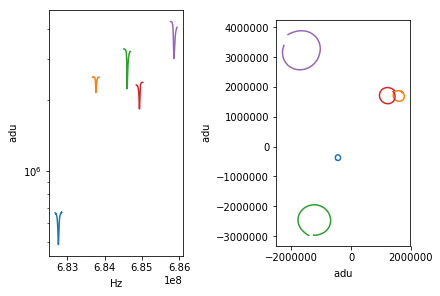

In [65]:
import numpy as np
from astropy.visualization import quantity_support  # this will label axis with the quantities' units
quantity_support()  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True)
for i in range(5):
    swp = kd[i]
    ax1.plot(swp.frequency, np.abs(swp.S21))  # f - |S21|
    ax2.plot(swp.S21.real, swp.S21.imag)  # I-Q plane
ax1.set_yscale('log')
ax2.set_aspect('equal')

In our KIDs data reduction, we compute the so called "D21", the derivative of S21, to locate the detectors.

This data file being a raw obs data, it does not have the D21 inplace. So we need to compute it and plot. As a caveat, the D21 will not be computed if we slice the `MultiSweep` as above. Instead, we call the method `get_sweep()` to compute a `Sweep` object, which have D21 computed from the MultiSweep's S21.

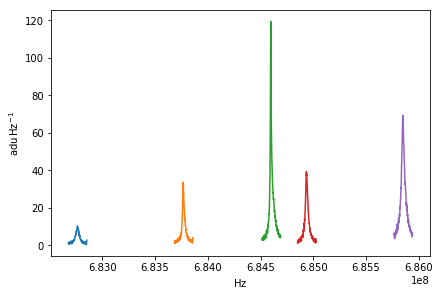

In [64]:
fig, ax1 = plt.subplots(1, 1, constrained_layout=True)
for i in range(5):
    swp = kd.get_sweep(i)  # swp is a `kidsproc.kidsdata.Sweep`
    ax1.plot(swp.frequency, swp.D21)  # f - |D21|

## Opening the KIDs model file and loading the model

We run a KIDs model fitting to each KIDs sweep data as soon as the data is taken. This KIDs model file is used to
interpret the time streams followed by the sweep. Let's download the KIDs model file associated with the KIDs data file that we just downloaded:

In [66]:
kidsmodel_filepath = download_file('https://drive.google.com/uc?export=download&id=1KjSd6EeU2gLnF6Eeet3gwfc-jYi9g1nW')
print(f"downloaded kids model filepath: {kidsmodel_filepath}")

downloaded kids model filepath: /var/folders/zc/33kgh8vx3z37kpp6xf84bzvm0000gn/T/astropy-download-70158-6k65e4t3


The KIDs model file can be opened as a `BasicObsData` as well:

In [72]:
km = BasicObsData.read(kidsmodel_filepath)  # this is a shortcut of `BasicObsData.open` and call the read method
print(km)
print(dir(km))

KidsSweepGainWithLinTrend(648)
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_get_model', '_get_model_cls', '_meta', '_table', 'derotate', 'get_model', 'logger', 'make_sweep', 'meta', 'model', 'model_cls', 'n_models', 'table']


The returned is a `tolteca.datamodels.io.toltec.table.KidsModelParams` instance.

The most useful method of `km` is `derotate`, which allow one to "normalize" the measured S21 in the I-Q plane to a
circle with radius equal to the quality factor (Qr) of the detector:

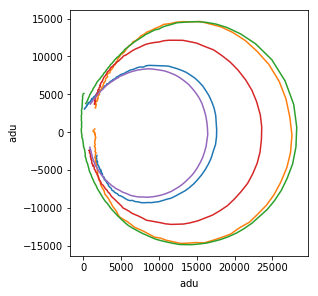

In [76]:
fig, ax1 = plt.subplots(1, 1, constrained_layout=True)
kd_derot = km.derotate(kd)
for i in range(5):
    swp_derot = kd_derot.get_sweep(i)  # swp is a `kidsproc.kidsdata.Sweep`
    ax1.plot(swp_derot.S21.real, swp_derot.S21.imag)  # I - Q derot
ax1.set_aspect('equal')